# 1.0 Extract, Transform and Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("imported successes ")

imported successes 


In [14]:
#Load in the dataset

# Update the path below to the actual location of your file in Google Drive
sales = pd.read_csv("Sales_Data.csv", encoding='latin1')
print("loaded data successfully")

loaded data successfully


In [ ]:

## What makes a dirty data?
# Missing values

# Duplicates
# inconsistent data columns
# wrong datatype ....>to change datatypes we use ".astype()" ----> to check datatypes we use "dtypes"
# incomplete data

## Why do we need to clean data? We clean data to ensure
# --->Data integrity, accuracy and consistency---->


## Data anaysis pipeline
#1. ETL (Extract, Transform and Load)
#2. creating data model for visualization
#3. building dashboard
#4. Reporting and presentation

## Data Science pipeline
#1. Preliminary analysis
#2. EDA Exploratory data analysis
#3. Data cleaning
#4. Analysis(Data Wrangling)
#5. Data preprocessing and data mining
#6. Building your model(prediction, forcasting, classification, clustering)
#7. Reporting and visualization
#8. Deployment
#9. Maintenance and monitoring
#10.Support and troubleshooting
#----> Please note that from step2 to step5 is an iterative process that is dependent on step 6. Step 6 itself could also be iterative

### Data Inspection and Exploration

In [26]:
# View a snapshot of your dataset
sales.head()

,Sales Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,1/1/2021,"$8,414",495
1,Dennison Crosswaite,Canada,White Choc,1/1/2021,$532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,1/1/2021,"$5,376",269
3,Barr Faughny,New Zealand,Baker's Choco Chips,1/1/2021,$259,22
4,Beverie Moffet,USA,Manuka Honey Choco,1/1/2021,"$5,530",179


In [27]:
# View the last 5 rows of your dataset
sales.tail()

,Sales Person,Geography,Product,Date,Amount,Boxes
3786,Van Tuxwell,India,Drinking Coco,19/1/2022,"$10,682",1526
3787,Rafaelita Blaksland,Australia,Mint Chip Choco,18/1/2022,"$11,746",511
3788,Kelci Walkden,Australia,Spicy Special Slims,3/1/2022,"$8,862",1477
3789,Gunar Cockshoot,New Zealand,Mint Chip Choco,21/1/2022,"$11,592",527
3790,Mallorie Waber,USA,Spicy Special Slims,7/1/2022,"$3,871",431


In [28]:
# View the number of rows and columns in your dataset
sales.shape



(3791, 6)

In [29]:
# View the column names in your dataset
sales.columns


Index(['Sales Person', 'Geography', 'Product', 'Date', 'Amount', 'Boxes'], dtype='object')

In [30]:
# View the data types of each column
sales.dtypes


Sales Person    object
Geography       object
Product         object
Date            object
Amount          object
Boxes            int64
dtype: object

In [31]:
# View a summary of your dataset
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Person  3791 non-null   object
 1   Geography     3791 non-null   object
 2   Product       3791 non-null   object
 3   Date          3791 non-null   object
 4   Amount        3791 non-null   object
 5   Boxes         3791 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 177.8+ KB


#### Data Cleaning 
### Ensure that Amount is captured as float

In [35]:
# Change column name from Amount to Amount($)
sales.rename(columns={"Amount": "Amount($)"}, inplace=True)
sales.head()

,Sales Person,Geography,Product,Date,Amount($),Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,1/1/2021,"$8,414",495
1,Dennison Crosswaite,Canada,White Choc,1/1/2021,$532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,1/1/2021,"$5,376",269
3,Barr Faughny,New Zealand,Baker's Choco Chips,1/1/2021,$259,22
4,Beverie Moffet,USA,Manuka Honey Choco,1/1/2021,"$5,530",179


In [37]:
# Remove the '$' and ',' from the string in the Amount($) column
sales["Amount($)"] = sales["Amount($)"].str.replace('$', '').str.replace(',', '')
sales.head()

,Sales Person,Geography,Product,Date,Amount($),Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,1/1/2021,8414,495
1,Dennison Crosswaite,Canada,White Choc,1/1/2021,532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,1/1/2021,5376,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,1/1/2021,259,22
4,Beverie Moffet,USA,Manuka Honey Choco,1/1/2021,5530,179


In [38]:
# Convert the clean string to a numeric type (float)
convert_amount = sales["Amount($)"].astype(float)
sales["Amount($)"] = convert_amount
sales.head()

,Sales Person,Geography,Product,Date,Amount($),Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,1/1/2021,8414.0,495
1,Dennison Crosswaite,Canada,White Choc,1/1/2021,532.0,54
2,Karlen McCaffrey,USA,99% Dark & Pure,1/1/2021,5376.0,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,1/1/2021,259.0,22
4,Beverie Moffet,USA,Manuka Honey Choco,1/1/2021,5530.0,179


### Checking for missing data, duplicates and others

In [32]:
# Check for dirtiness of data (missing data)
sales.isna().sum()

Sales Person    0
Geography       0
Product         0
Date            0
Amount          0
Boxes           0
dtype: int64

In [39]:
# Checking for Duplicates
sales.duplicated().sum()


np.int64(0)

In [ ]:
# Do a little bit of feature engineering

# add revenue unit price  column
# To create a new column, you start with creating the new columns as a variable name

# Amount/Boxes  = Unit Price
 

sales["Unit Price ($)"] = sales["Amount($)"]/sales["Boxes"]
 
# Rounding to 2 decimal places
sales["Unit Price ($)"] = sales["Unit Price ($)"].round(2)
sales.head()








,Sales Person,Geography,Product,Date,Amount($),Boxes,Unit Price ($)
0,Barr Faughny,New Zealand,Raspberry Choco,1/1/2021,8414.0,495,17.00
1,Dennison Crosswaite,Canada,White Choc,1/1/2021,532.0,54,9.85
2,Karlen McCaffrey,USA,99% Dark & Pure,1/1/2021,5376.0,269,19.99
3,Barr Faughny,New Zealand,Baker's Choco Chips,1/1/2021,259.0,22,11.77
4,Beverie Moffet,USA,Manuka Honey Choco,1/1/2021,5530.0,179,30.89


**Feature Engineering**
* Explanation:

Feature Engineering- This means 3 things, one is useful here and the other two for machine learning. Feature engineering in this context, has to do with creating a new feature or column by combining, extracting or simply doing calculation on an existing column or feature.

In [50]:
# view to see if the changes has been effected
sales.head()

,Sales Person,Geography,Product,Date,Amount($),Boxes,Unit Price ($)
0,Barr Faughny,New Zealand,Raspberry Choco,1/1/2021,8414.0,495,17.00
1,Dennison Crosswaite,Canada,White Choc,1/1/2021,532.0,54,9.85
2,Karlen McCaffrey,USA,99% Dark & Pure,1/1/2021,5376.0,269,19.99
3,Barr Faughny,New Zealand,Baker's Choco Chips,1/1/2021,259.0,22,11.77
4,Beverie Moffet,USA,Manuka Honey Choco,1/1/2021,5530.0,179,30.89


In [51]:
# lets check data types
sales.dtypes

Sales Person       object
Geography          object
Product            object
Date               object
Amount($)         float64
Boxes               int64
Unit Price ($)    float64
dtype: object

In [56]:
# lets convert the date column to datatime
# Using "pd.to_datetime()" function

#to_datetime()

# datetime()
sales["Date"] = pd.to_datetime(sales["Date"], dayfirst=True)
sales.dtypes

Sales Person              object
Geography                 object
Product                   object
Date              datetime64[ns]
Amount($)                float64
Boxes                      int64
Unit Price ($)           float64
dtype: object

In [57]:
# lets check our data types
sales.dtypes

Sales Person              object
Geography                 object
Product                   object
Date              datetime64[ns]
Amount($)                float64
Boxes                      int64
Unit Price ($)           float64
dtype: object

<Axes: xlabel='Data Types', ylabel='Count'>

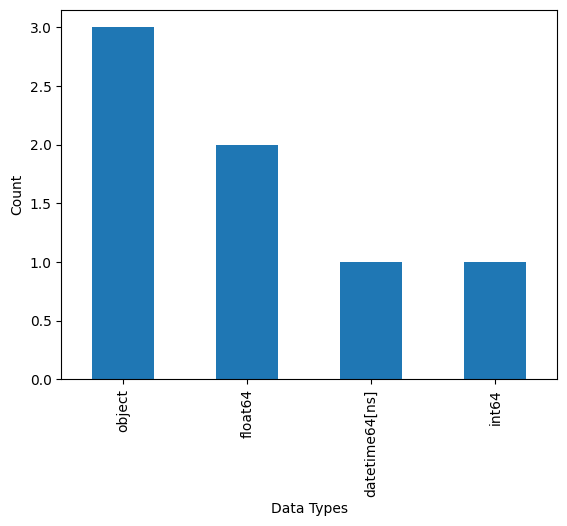

In [58]:
# lets just plot  this, its not important though.
sales.dtypes.value_counts().plot(kind="bar", xlabel = "Data Types", ylabel = "Count")

In [59]:
# Lets do more feature engineering

# lets  work on our datetime to extract the month,year and week name
# using ".dt.year",".dt.month_name()",".day_name()

sales["Year"] = sales["Date"].dt.year
sales["Month"] = sales["Date"].dt.month_name()
sales["Week"] = sales["Date"].dt.day_name()

In [60]:
sales.head()

,Sales Person,Geography,Product,Date,Amount($),Boxes,Unit Price ($),Year,Month,Week
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414.0,495,17.00,2021,January,Friday
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532.0,54,9.85,2021,January,Friday
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376.0,269,19.99,2021,January,Friday
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259.0,22,11.77,2021,January,Friday
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530.0,179,30.89,2021,January,Friday


#2.0 Steps to Analysis
**Note:** This is after you have followed the ETL(Extract Transform Load) frame work, this is you importing your dataset, cleaning and preparing it for analysis

### A. Work on the KPI's (Key performance index of this data)
1. Total units sold
2. Total Revenue
3. Average Revenue per unit
4. Numbers of products
5. Numbers of Sales Agents

### B. Work on the insights by creating models(Note that creating models in data analysis is different from building models in machine learning)
1. Total monthly revenue by Year
2. Total revenue by branch
3. Total revenue by products
4. Total revenue by sales agent
5. Total revenue by week
6. Total revenue by month
7. Trends of sales

### C. Build your dash board
1. Add the title of your analysis.
2. Add the business/company
3. Add your KPI's
4. Add Charts with appropriate labelling
5. Add your slicer if you are working with streamlit or excel or PowerBi or Tableau to make your dashboard interactive(if not, exclude it)

### C. Report your insights
1. Start with the an executive summary briefly explaining what you and briefly introducing the KPI's.
2. Explain your insights in a narative and relatable way using your visuals.

### D. Make recommendation
1. What should the business owner to increase monthly sales
2. Which of the brannches should be given more attention
3. Which products should be removed from the stock, which products should be purchased more
4. Which of the sales agents should be given more incentives/promoted to sales managers position



Ronald Coase-"if you torture the data long enough, it will confess to anything"

### A. Working on the PKI's


In [63]:
#1. Total boxes sold

Total_goods_sold = sales["Boxes"].sum()
print(f"Total goods sold: {Total_goods_sold} boxes")

Total goods sold: 1344574 boxes


In [65]:
#2. Total Revenue
Total_Revenue = sales["Amount($)"].sum()
print(f"Total Revenue: ${Total_Revenue}")

Total Revenue: $21701722.0


In [70]:
#3. Average Revenue per box
## using "round() function to approximate to 2 decimal place"
Average_revenue_per_box = round(Total_Revenue / Total_goods_sold,2)
print(f"Average Revenue per box: ${Average_revenue_per_box}")

Average Revenue per box: $16.14


In [68]:
#4. Numbers of products
## using the .nunique() shows the numbers of unique values
Numbers_of_products = sales["Product"].nunique()
print(f"Numbers of products: {Numbers_of_products}")

Numbers of products: 25


In [71]:
#5. Numbers of Countries
Numbers_of_countries = sales["Geography"].nunique()
print(f"Numbers of Countries: {Numbers_of_countries}")
 

Numbers of Countries: 42


In [73]:
#6. Numbers of Sales Persons
Numbers_of_sales_persons = sales["Sales Person"].nunique()
print(f"Numbers of Sales Persons: {Numbers_of_sales_persons}")

Numbers of Sales Persons: 26


In [77]:
#7 Number of years in the dataset
Number_of_years = sales["Year"].nunique()
print(f"Number of years in the dataset: {Number_of_years}")

#8. List the years in the dataset
List_of_years = sales["Year"].unique()
print(f"List of years in the dataset: {List_of_years}")


Number of years in the dataset: 2
List of years in the dataset: [2021 2022]


##B. Work on the insights by creating models and plotting their charts.

In [74]:
# Set index using the date column
sales.set_index("Date", inplace=True)

In [ ]:
#List of years in the dataset

sales.Year.unique()

array([2021, 2022], dtype=int32)

Calculating the Total Monthly revenue for year 2021 and ploting the chart using 3 visualization packages in python

In [ ]:
# Create a new dataframe for year 2021
sales_2021 = sales[sales["Year"] == 2021]

In [ ]:
#1. Filtering
#2. Grouping
#3. Visuals

# lets start analysing this dataset for insights





# 1. Monthly revenue in 2021

# step1: Filter for 2021



sales_2021 = sales[sales["Year"] == 2021]
sales_2021.head(3)

,Sales Person,Geography,Product,Amount($),Boxes,Unit Price ($),Year,Month,Week
Date,,,,,,,,,
2021-01-01,Barr Faughny,New Zealand,Raspberry Choco,8414.0,495,17.00,2021,January,Friday
2021-01-01,Dennison Crosswaite,Canada,White Choc,532.0,54,9.85,2021,January,Friday
2021-01-01,Karlen McCaffrey,USA,99% Dark & Pure,5376.0,269,19.99,2021,January,Friday


In [88]:
# Step2:
# 1. To force indexing by month because the month is not in number but in *names* (Jan, Feb, ...)
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
# I am using the .sort_index() to arrange the output, so the arrangement is done base on the index in month
Total_monthly_revenue = sales_2021.groupby("Month")["Amount($)"].sum().reindex(month_order)
Total_monthly_revenue
 



Month
January      1650635.0
February     1674323.0
March        1702281.0
April        1575700.0
May          1677242.0
June         1360338.0
July         1358504.0
August       1569470.0
September    1275022.0
October      1478897.0
November     1482075.0
December     1827007.0
Name: Amount($), dtype: float64

In [89]:
# I am using the .sort_values() to arrange the output, so the arrangement is done base on the values

Total_monthly_revenue = sales_2021.groupby("Month")["Amount($)"].sum().sort_values(ascending = False)
Total_monthly_revenue

Month
December     1827007.0
March        1702281.0
May          1677242.0
February     1674323.0
January      1650635.0
April        1575700.0
August       1569470.0
November     1482075.0
October      1478897.0
June         1360338.0
July         1358504.0
September    1275022.0
Name: Amount($), dtype: float64

<Axes: xlabel='Month', ylabel='Amount($)'>

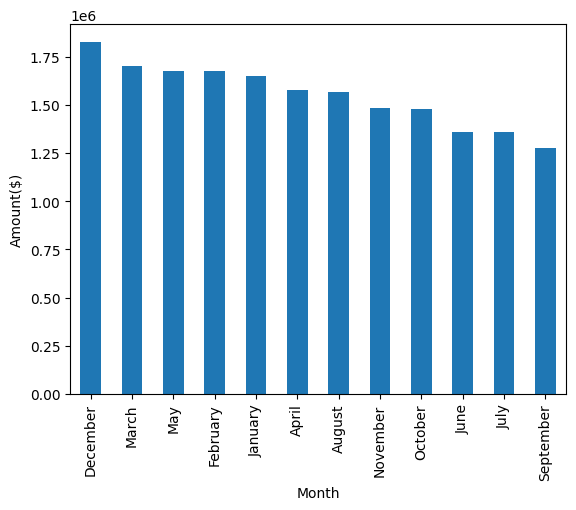

In [90]:
# lets put this in a plot using pandas
Total_monthly_revenue.plot(kind = "bar",xlabel = "Month", ylabel ="Amount($)")

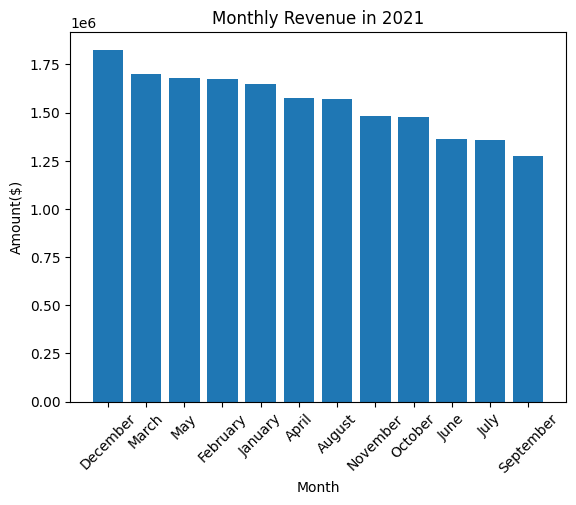

In [91]:
# lets use matlplotlib
plt.bar(Total_monthly_revenue.index, Total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Amount($)")
plt.title("Monthly Revenue in 2021")
plt.xticks(rotation = 45)
plt.show()

### Let follow the same step and calculate the monthly revenue for 2022 and plot that charts using the 3 visualization packages in python.

In [101]:
# Create a new dataframe for year 2022
sales_2022 = sales[sales["Year"] == 2022]
sales_2022

,Sales Person,Geography,Product,Amount($),Boxes,Unit Price ($),Year,Month,Week
Date,,,,,,,,,
2022-01-26,Barr Faughny,Canada,50% Dark Bites,4067.0,170,23.92,2022,January,Wednesday
2022-01-05,Kelci Walkden,Canada,After Nines,14553.0,910,15.99,2022,January,Wednesday
2022-01-24,Rafaelita Blaksland,Canada,70% Dark Bites,2730.0,137,19.93,2022,January,Monday
2022-01-19,Jan Morforth,UK,Smooth Sliky Salty,9625.0,642,14.99,2022,January,Wednesday
2022-01-28,Marney O'Breen,Canada,Peanut Butter Cubes,10255.0,733,13.99,2022,January,Friday
...,...,...,...,...,...,...,...,...,...
2022-01-19,Van Tuxwell,India,Drinking Coco,10682.0,1526,7.00,2022,January,Wednesday
2022-01-18,Rafaelita Blaksland,Australia,Mint Chip Choco,11746.0,511,22.99,2022,January,Tuesday
2022-01-03,Kelci Walkden,Australia,Spicy Special Slims,8862.0,1477,6.00,2022,January,Monday


In [99]:
# Create a new dataframe for year 2022
sales_2022 = sales[sales["Year"] == 2022]
sales_2022.head(3)
 
Total_monthly_revenue2

Month
January      3070228.0
February           NaN
March              NaN
April              NaN
May                NaN
June               NaN
July               NaN
August             NaN
September          NaN
October            NaN
November           NaN
December           NaN
Name: Amount($), dtype: float64

In [ ]:
#2. Total revenue by Geography

# lest check the branches we have first
sales["Geography"].unique()
sales.Geography.unique() # this gave duplicate places probably because of leading or trailing whitespace

# Remove leading and trailing whitespace from the entire column
sales["Geography"] = sales["Geography"].str.strip()

# Now get unique values again
clean_unique_values = sales["Geography"].unique()
print(clean_unique_values)


['New Zealand' 'Canada' 'USA' 'India' 'UK' 'Australia']


array(['New Zealand', 'Canada', 'USA', 'India', 'UK', 'Australia'],
      dtype=object)

In [110]:
Total_revenue_by_geography = sales.groupby("Geography")["Amount($)"].sum().sort_values(ascending = False)
Total_revenue_by_geography

Geography
New Zealand    3776766.0
India          3760400.0
UK             3590153.0
Canada         3583769.0
Australia      3545052.0
USA            3445582.0
Name: Amount($), dtype: float64

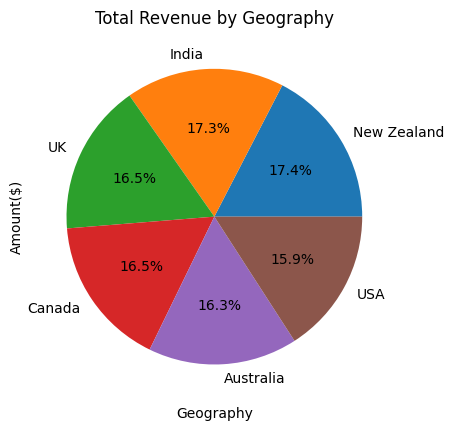

In [111]:
# plot the chart for Total Revenue by geography using matplotlib
plt.pie(Total_revenue_by_geography.values, labels=Total_revenue_by_geography.index, autopct='%1.1f%%')
plt.xlabel("Geography")
plt.ylabel("Amount($)")
plt.title("Total Revenue by Geography")
plt.show()

In [117]:
#Total revenue by products
## let's check the products available first
# Get unique values and sort them alphabetically (A-Z)
sorted_unique_asc = np.sort(sales["Product"].unique())
print("Sorted Ascending (A-Z):")
print(sorted_unique_asc)


Sorted Ascending (A-Z):
['50% Dark Bites' '70% Dark Bites' '85% Dark Bars' '99% -Dark & Pure'
 '99% Dark & Pure' 'After Nines' 'Almond Choco' "Baker's Choco Chips"
 'Caramel Stuffed Bars' 'Choco Coated Almonds' 'Drinking Coco' 'Eclairs'
 'Fruit & Nut Bars' 'Manuka Honey Choco' 'Manuka Honey Chocos' 'Milk Bars'
 'Mint Chip Choco' 'Orange Choco' 'Organic Choco Syrup'
 'Peanut Butter Cubes' 'Raspberry Choco' 'Smooth Sliky Salty'
 'Spicy Special Slims' 'White Choc' 'White-Choc']


In [119]:
# Fixing inconsistent product names
# Create a mapping dictionary for known inconsistencies
product_name_map = {
    # Fix clear typos and misspellings
    'Smooth Sliky Salty': 'Smooth Silky Salty',  # Fix 'Sliky' -> 'Silky'
    
    # Fix hyphen and space inconsistencies (standardize format)
    '99% -Dark & Pure': '99% Dark & Pure',       # Remove erroneous hyphen
    'White-Choc': 'White Choc',                  # Replace hyphen with space
    
    # Fix inconsistent pluralization (choose one standard)
    'Manuka Honey Chocos': 'Manuka Honey Choco', # Fix plural 'Chocos' -> 'Choco'
}
# Apply the mapping to the Product column
sales["Product"] = sales["Product"].replace(product_name_map)
sales["Product"].unique()

array(['Raspberry Choco', 'White Choc', '99% Dark & Pure',
       "Baker's Choco Chips", 'Manuka Honey Choco', '85% Dark Bars',
       'Organic Choco Syrup', 'Caramel Stuffed Bars', 'Milk Bars',
       'Mint Chip Choco', 'Orange Choco', 'Eclairs', 'After Nines',
       'Spicy Special Slims', 'Drinking Coco', 'Peanut Butter Cubes',
       'Choco Coated Almonds', 'Fruit & Nut Bars', '50% Dark Bites',
       '70% Dark Bites', 'Almond Choco', 'Smooth Silky Salty'],
      dtype=object)

In [120]:
# Now we can proceed to calculate total revenue by product
Total_revenue_by_product = sales.groupby("Product")["Amount($)"].sum().sort_values(ascending = False)
Total_revenue_by_product

Product
99% Dark & Pure         1089312.0
Choco Coated Almonds    1075109.0
Organic Choco Syrup     1047011.0
50% Dark Bites          1030323.0
Spicy Special Slims     1029490.0
After Nines             1027054.0
85% Dark Bars           1015994.0
Raspberry Choco         1005046.0
Almond Choco             995050.0
Caramel Stuffed Bars     994021.0
Eclairs                  992271.0
Smooth Silky Salty       990794.0
Peanut Butter Cubes      987525.0
White Choc               979188.0
Manuka Honey Choco       948983.0
Orange Choco             946099.0
Fruit & Nut Bars         943551.0
Milk Bars                942921.0
70% Dark Bites           938049.0
Baker's Choco Chips      932491.0
Drinking Coco            902384.0
Mint Chip Choco          889056.0
Name: Amount($), dtype: float64

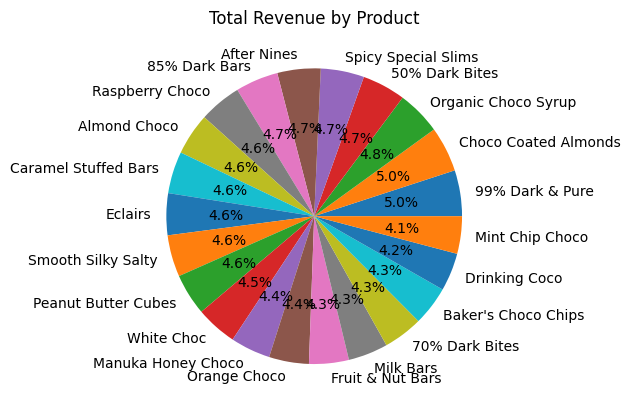

In [127]:
# LEts plot
plt.pie(Total_revenue_by_product.values, labels=Total_revenue_by_product.index, autopct='%1.1f%%')
plt.title("Total Revenue by Product")
plt.show()

In [123]:
#3. Total revenue by sales agents

#Lets check who our sales agents are arranged alphabetically
 
persons_sorted_unique_asc = np.sort(sales["Sales Person"].unique())
print("Sales Agents Sorted Ascending (A-Z):")
print(persons_sorted_unique_asc)


Sales Agents Sorted Ascending (A-Z):
['Andria Kimpton' 'Barr Faughny' 'Beverie Moffet' 'Brien Boise'
 'Camilla Castle' 'Ches Bonnell' 'Ches Bonnell*' 'Curtice Advani'
 'Dennison Crosswaite' 'Dotty Strutley' 'Gigi Bohling' 'Gunar Cockshoot'
 'Husein Augar' 'Jan Morforth' 'Jehu Rudeforth' 'Kaine Padly'
 'Karlen McCaffrey' 'Kelci Walkden' 'Madelene Upcott' 'Mallorie Waber'
 "Marney O'Breen" 'Oby Sorrel' 'Rafaelita Blaksland' 'Roddy Speechley'
 'Van Tuxwell' "Wilone O'Kielt"]


In [129]:
persons_name_map = {
    # Fix clear typos and misspellings
    'Ches Bonnell*': 'Ches Bonnell',  # Fix 'Sliky' -> 'Silky'
}
# Apply the mapping to the Sales Person column
sales["Sales Person"] = sales["Sales Person"].replace(persons_name_map)
persons_sorted_unique_asc = np.sort(sales["Sales Person"].unique())
print("Sales Agents Sorted Ascending (A-Z):")
print(persons_sorted_unique_asc)

Sales Agents Sorted Ascending (A-Z):
['Andria Kimpton' 'Barr Faughny' 'Beverie Moffet' 'Brien Boise'
 'Camilla Castle' 'Ches Bonnell' 'Curtice Advani' 'Dennison Crosswaite'
 'Dotty Strutley' 'Gigi Bohling' 'Gunar Cockshoot' 'Husein Augar'
 'Jan Morforth' 'Jehu Rudeforth' 'Kaine Padly' 'Karlen McCaffrey'
 'Kelci Walkden' 'Madelene Upcott' 'Mallorie Waber' "Marney O'Breen"
 'Oby Sorrel' 'Rafaelita Blaksland' 'Roddy Speechley' 'Van Tuxwell'
 "Wilone O'Kielt"]


In [130]:
# Now we can proceed to calculate total revenue by sales agents
Total_revenue_by_sales_agent = sales.groupby("Sales Person")["Amount($)"].sum().sort_values(ascending = False)
Total_revenue_by_sales_agent

Sales Person
Karlen McCaffrey       963956.0
Roddy Speechley        957047.0
Wilone O'Kielt         944580.0
Gigi Bohling           925057.0
Dotty Strutley         922635.0
Gunar Cockshoot        913325.0
Rafaelita Blaksland    903616.0
Madelene Upcott        897554.0
Jehu Rudeforth         895363.0
Dennison Crosswaite    890708.0
Kelci Walkden          889602.0
Barr Faughny           886375.0
Ches Bonnell           884835.0
Andria Kimpton         867510.0
Van Tuxwell            863079.0
Mallorie Waber         860846.0
Oby Sorrel             860083.0
Kaine Padly            828058.0
Beverie Moffet         817572.0
Camilla Castle         798868.0
Marney O'Breen         797629.0
Brien Boise            794920.0
Jan Morforth           780038.0
Curtice Advani         779422.0
Husein Augar           779044.0
Name: Amount($), dtype: float64

<Axes: ylabel='Sales Person'>

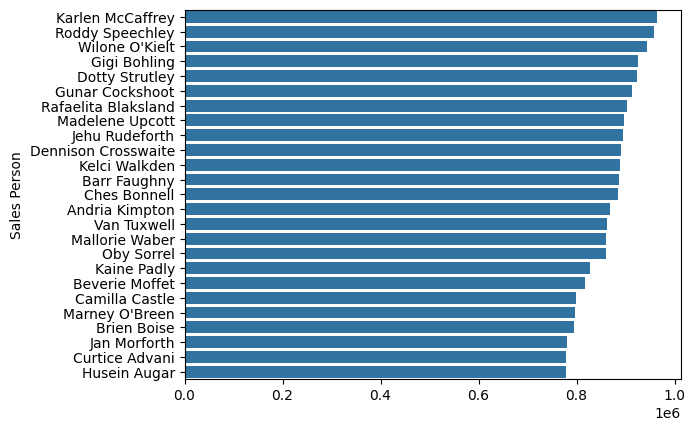

In [131]:
# lets plot using seaborn barchart
sns.barplot(x = Total_revenue_by_sales_agent.values, y = Total_revenue_by_sales_agent.index, orient = "h")

In [132]:
#4. Total revenue by week
Total_revenue_by_week = sales.groupby("Week")["Amount($)"].sum().sort_values(ascending = False)
Total_revenue_by_week

Week
Friday       5022101.0
Tuesday      4619944.0
Monday       4271358.0
Wednesday    3997581.0
Thursday     3790738.0
Name: Amount($), dtype: float64

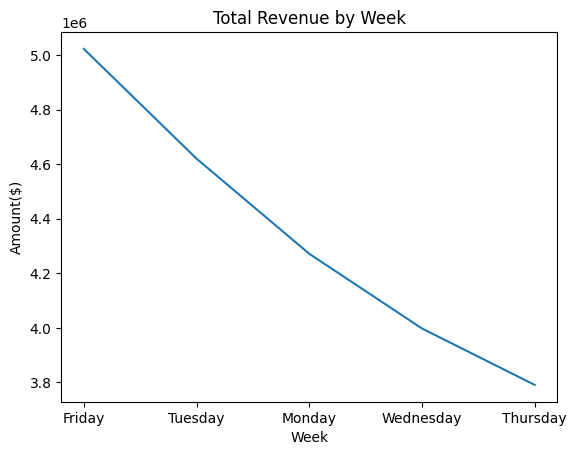

In [133]:
# lets plot this using line chart
plt.plot(Total_revenue_by_week.index, Total_revenue_by_week.values)
plt.xlabel("Week")
plt.ylabel("Amount($)")
plt.title("Total Revenue by Week")
plt.show()

In [134]:
#5. Total revenue by month
Total_revenue_by_month = sales.groupby("Month")["Amount($)"].sum().sort_values(ascending = False)
Total_revenue_by_month

Month
January      4720863.0
December     1827007.0
March        1702281.0
May          1677242.0
February     1674323.0
April        1575700.0
August       1569470.0
November     1482075.0
October      1478897.0
June         1360338.0
July         1358504.0
September    1275022.0
Name: Amount($), dtype: float64

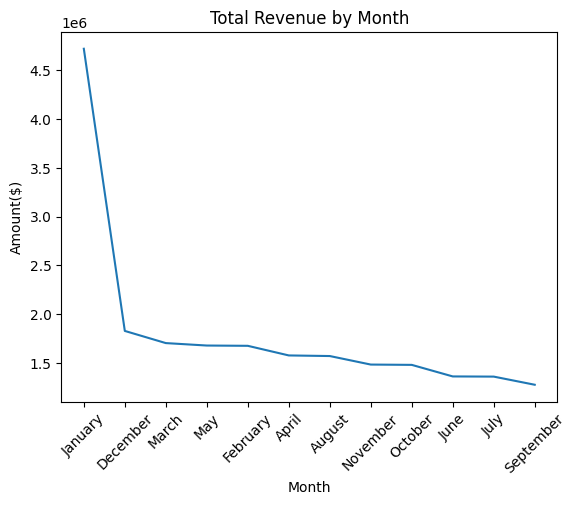

In [135]:
# plot using searborn line chart
sns.lineplot(x = Total_revenue_by_month.index, y = Total_revenue_by_month.values)
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("Amount($)")
plt.title("Total Revenue by Month")
plt.show()

In [139]:
#6. Trends of sales
Trends_of_sales_over_the_year = sales.groupby(["Year","Month"])["Amount($)"].sum().reset_index()
Trends_of_sales_over_the_year

,Year,Month,Amount($)
0,2021,April,1575700.0
1,2021,August,1569470.0
2,2021,December,1827007.0
3,2021,February,1674323.0
4,2021,January,1650635.0
5,2021,July,1358504.0
6,2021,June,1360338.0
7,2021,March,1702281.0
8,2021,May,1677242.0
9,2021,November,1482075.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

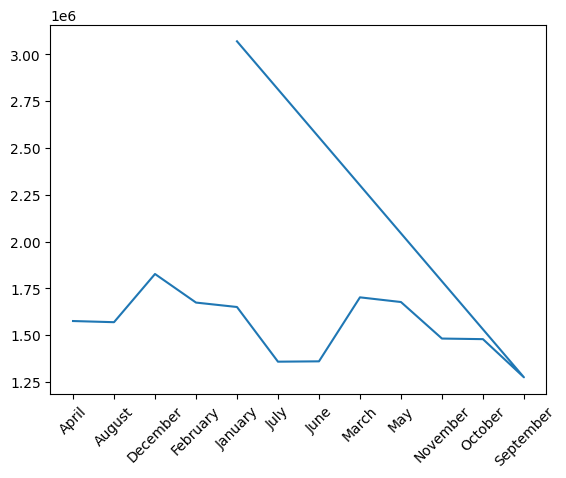

In [141]:
# lets plot
plt.plot(Trends_of_sales_over_the_year["Month"], Trends_of_sales_over_the_year["Amount($)"])
plt.xticks(rotation = 45)